In [2]:
import cv2
import matplotlib.pyplot as plt

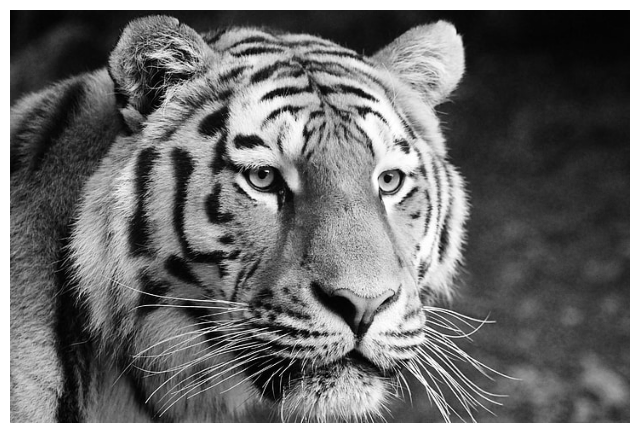

In [3]:
image = cv2.imread('tiger.jpg',cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8,10))
plt.imshow(image,cmap='grey')
plt.axis('off')
plt.show()

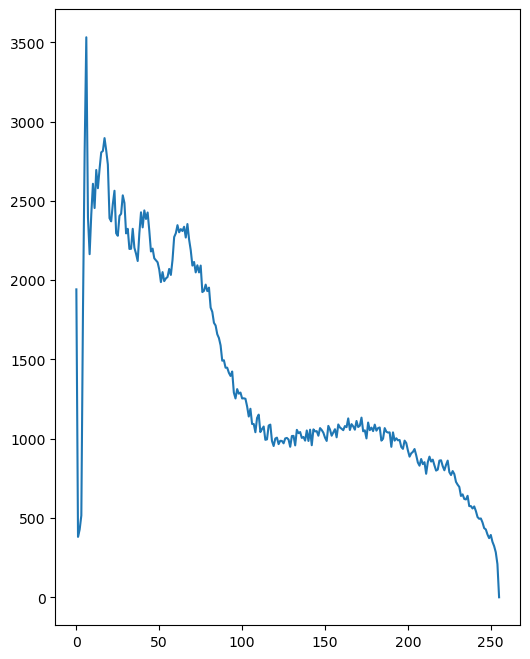

In [4]:
hist = cv2.calcHist([image],[0],None,[256],[0,255])

plt.figure(figsize=(6, 8))

plt.plot(hist)
plt.show()

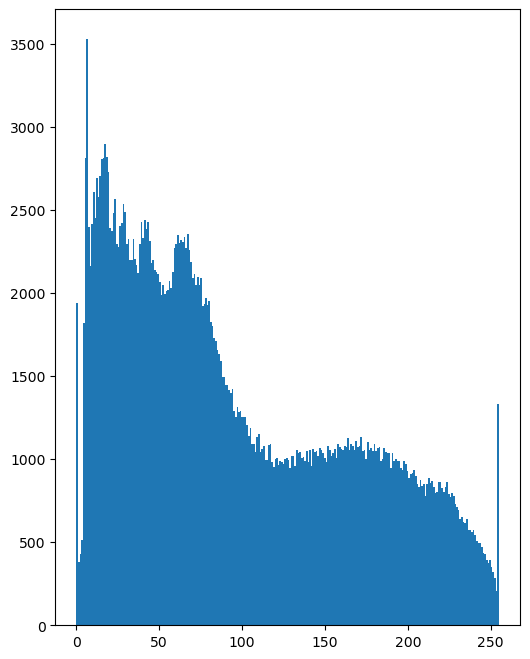

In [5]:
plt.figure(figsize=(6,8))
plt.hist(image.flatten(),256,[0,255])
plt.show()


[1942, 381, 428, 516, 1817, 2811, 3532, 2397, 2164, 2415, 2608, 2455, 2695, 2580, 2702, 2806, 2815, 2896, 2819, 2729, 2391, 2371, 2481, 2564, 2296, 2280, 2405, 2419, 2535, 2487, 2295, 2324, 2197, 2198, 2324, 2205, 2167, 2121, 2296, 2428, 2333, 2440, 2386, 2427, 2312, 2181, 2199, 2138, 2126, 2113, 2067, 1988, 2051, 1994, 2011, 2020, 2071, 2033, 2127, 2272, 2296, 2347, 2302, 2322, 2310, 2337, 2269, 2354, 2257, 2189, 2092, 2115, 2049, 2094, 2049, 2092, 1925, 1933, 1972, 1931, 1953, 1827, 1800, 1731, 1714, 1659, 1635, 1589, 1492, 1495, 1448, 1448, 1416, 1396, 1424, 1291, 1254, 1313, 1284, 1291, 1254, 1255, 1252, 1204, 1140, 1189, 1093, 1093, 1041, 1131, 1152, 1042, 1061, 1077, 993, 996, 1083, 1089, 986, 954, 1001, 1007, 966, 987, 986, 971, 1002, 1005, 995, 949, 1017, 1018, 958, 1056, 1035, 1042, 1005, 1011, 988, 1052, 986, 1057, 959, 1059, 1046, 1048, 1019, 1067, 1055, 1038, 1007, 986, 1081, 1058, 1019, 1039, 1060, 1009, 1090, 1071, 1063, 1054, 1080, 1073, 1128, 1055, 1092, 1078, 1057, 111

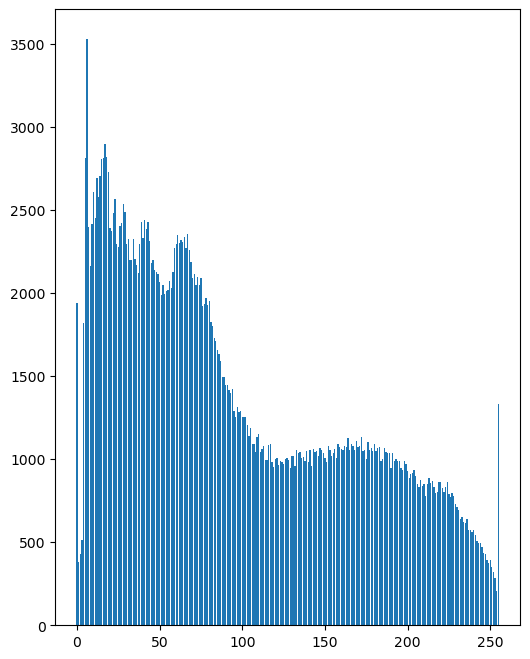

In [6]:
frequency = [0]*256
for row in image:
    for i in row:
        frequency[i] += 1

print(frequency)

plt.figure(figsize=(6,8))
plt.bar(range(0,256),frequency)
plt.show()

[]

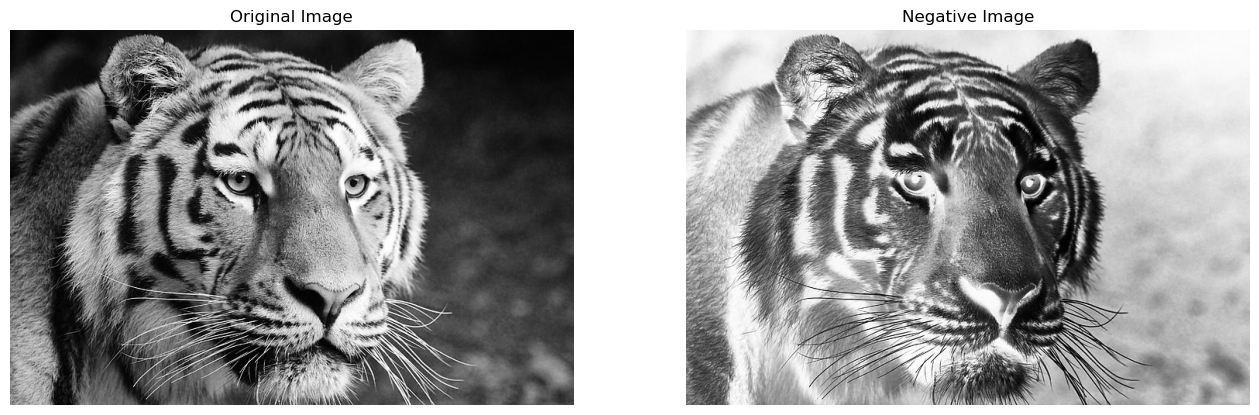

In [7]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("tiger.jpg",cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(img,cmap="grey")
plt.axis("off")
plt.title("Original Image")
plt.plot()

rows,cols = img.shape
for i in range(rows):
    for j in range(cols):
        img[i][j] = 255 - img[i][j]

plt.subplot(1,2,2)
plt.imshow(img,cmap="grey")
plt.axis("off")
plt.title("Negative Image")
plt.plot()

[]

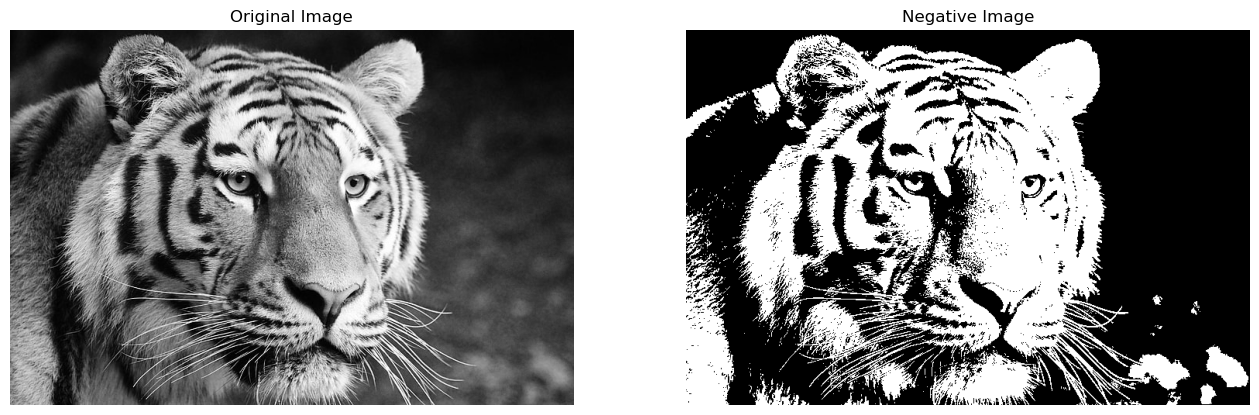

In [8]:
def threshold(r,threshold=100):
    s = 255 if r > threshold else 0
    return s

img = cv2.imread("tiger.jpg",cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(img,cmap="grey")
plt.axis("off")
plt.title("Original Image")
plt.plot()

rows,cols = img.shape
for i in range(rows):
    for j in range(cols):
        img[i][j] = threshold(img[i][j])

plt.subplot(1,2,2)
plt.imshow(img,cmap="grey")
plt.axis("off")
plt.title("Negative Image")
plt.plot()

[]

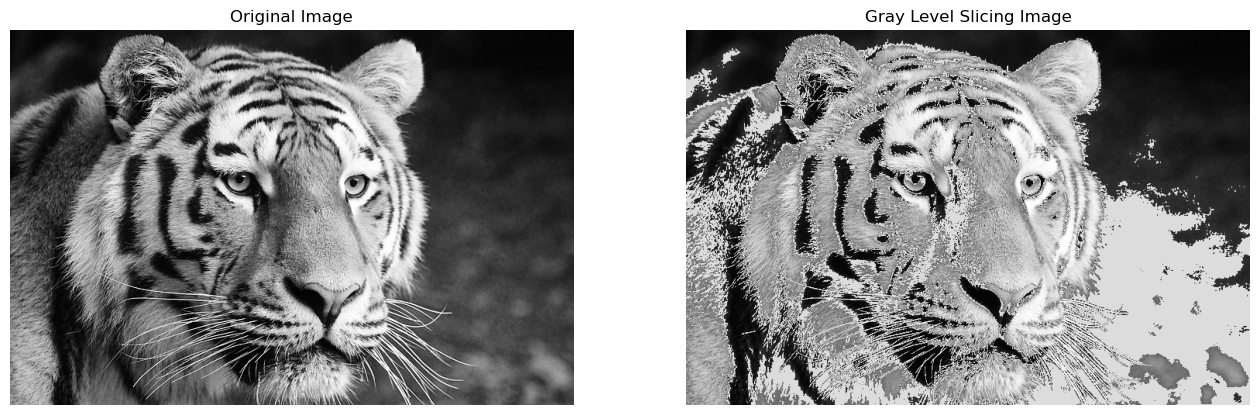

In [9]:
def T(r):
    s = 220 if r > 50 and r < 100 else r
    return s

img = cv2.imread("tiger.jpg",cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(img,cmap="grey")
plt.axis("off")
plt.title("Original Image")
plt.plot()

rows,cols = img.shape
for i in range(rows):
    for j in range(cols):
        img[i][j] = T(img[i][j])

plt.subplot(1,2,2)
plt.imshow(img,cmap="grey")
plt.axis("off")
plt.title("Gray Level Slicing Image")
plt.plot()

[]

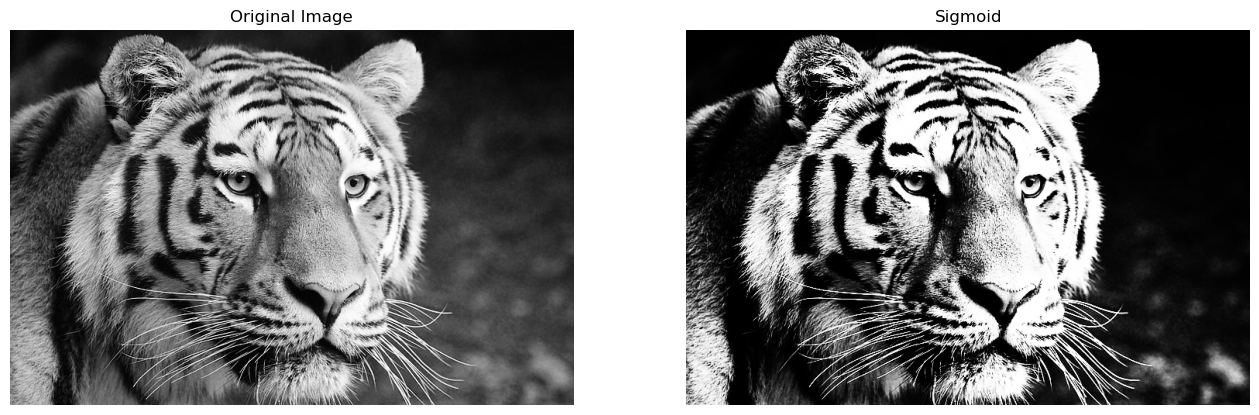

In [10]:
def sigmoid(r,k=0.05,r0 = 128):
    s = 255 / (1+2.71**(-k*(r-r0)))
    return int(s)

img = cv2.imread("tiger.jpg",cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(img,cmap="grey")
plt.axis("off")
plt.title("Original Image")
plt.plot()

rows,cols = img.shape
for i in range(rows):
    for j in range(cols):
        img[i][j] = sigmoid(img[i][j])

plt.subplot(1,2,2)
plt.imshow(img,cmap="grey")
plt.axis("off")
plt.title("Sigmoid")
plt.plot()

[]

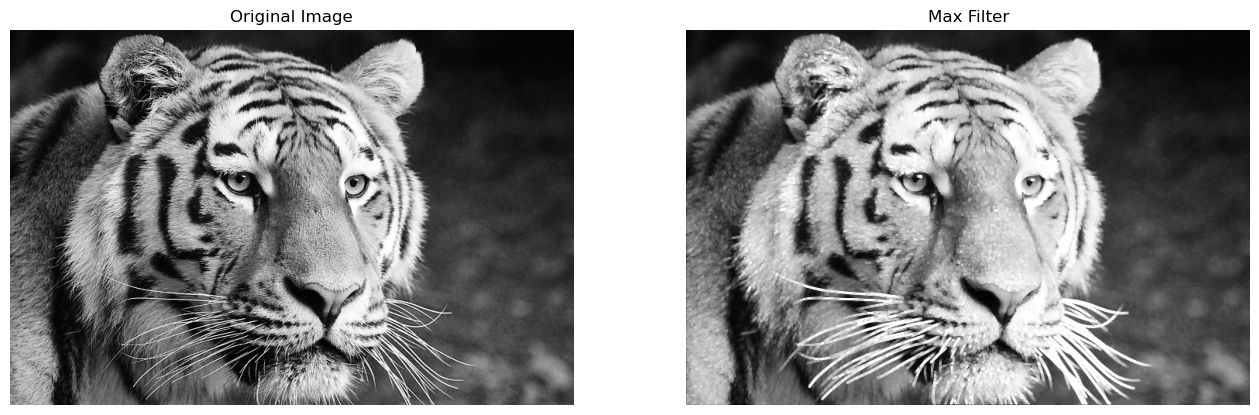

In [11]:
def maxFilter(img,i,j):
    result = 0
    for a in range(-1,2):
        for b in range(-1,2):
            result = max(img[i+a][j+b],result)

    return result        
img = cv2.imread("tiger.jpg",cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(img,cmap="grey")
plt.axis("off")
plt.title("Original Image")
plt.plot()

rows,cols = img.shape
dummy = img.copy()
for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        dummy[i][j] = maxFilter(img, i, j)

plt.subplot(1,2,2)
plt.imshow(dummy,cmap="grey")
plt.axis("off")
plt.title("Max Filter")
plt.plot()

[]

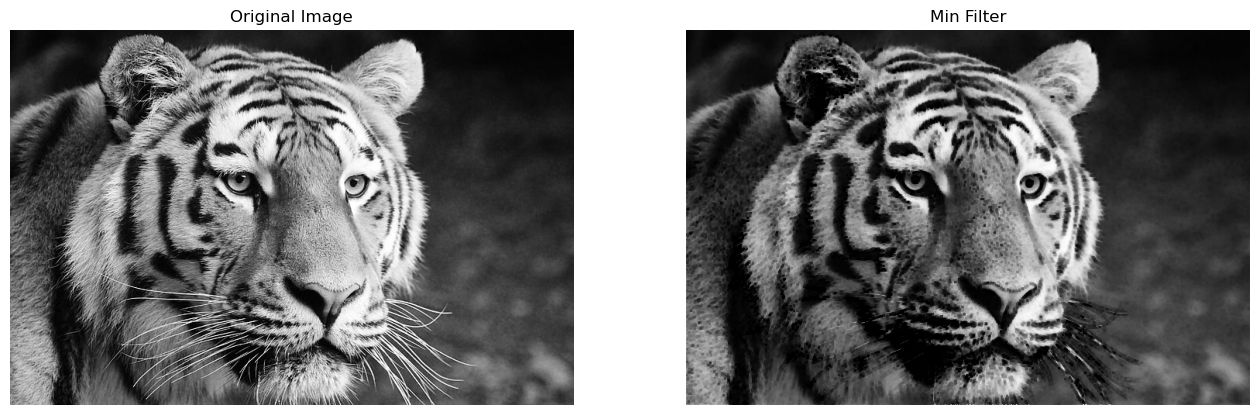

In [12]:
def minFilter(img,i,j):
    result = 255
    for a in range(-1,2):
        for b in range(-1,2):
            result = min(img[i+a][j+b],result)

    return result  
      
img = cv2.imread("tiger.jpg",cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(img,cmap="grey")
plt.axis("off")
plt.title("Original Image")
plt.plot()

rows,cols = img.shape
dummy = img.copy()
for i in range(1,rows-1):
    for j in range(1,cols-1):
        dummy[i][j] = minFilter(img,i,j)

plt.subplot(1,2,2)
plt.imshow(dummy,cmap="grey")
plt.axis("off")
plt.title("Min Filter")
plt.plot()

[]

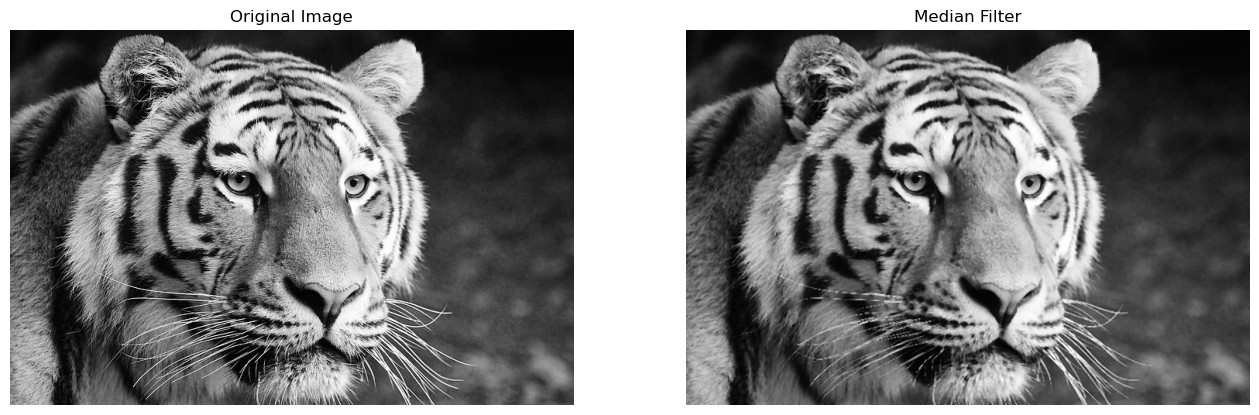

In [13]:
def medianFilter(img,i,j):
    neighbor = []
    for a in range(-1,2):
        for b in range(-1,2):
            neighbor.append(img[i+a][j+b])

    neighbor.sort()
    # print(neighbor)
    return neighbor[4] 
      
img = cv2.imread("tiger.jpg",cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(img,cmap="grey")
plt.axis("off")
plt.title("Original Image")
plt.plot()

rows,cols = img.shape
dummy = img.copy()
for i in range(1,rows-1):
    for j in range(1,cols-1):
        dummy[i][j] = medianFilter(img,i,j)

plt.subplot(1,2,2)
plt.imshow(dummy,cmap="grey")
plt.axis("off")
plt.title("Median Filter")
plt.plot()

[]

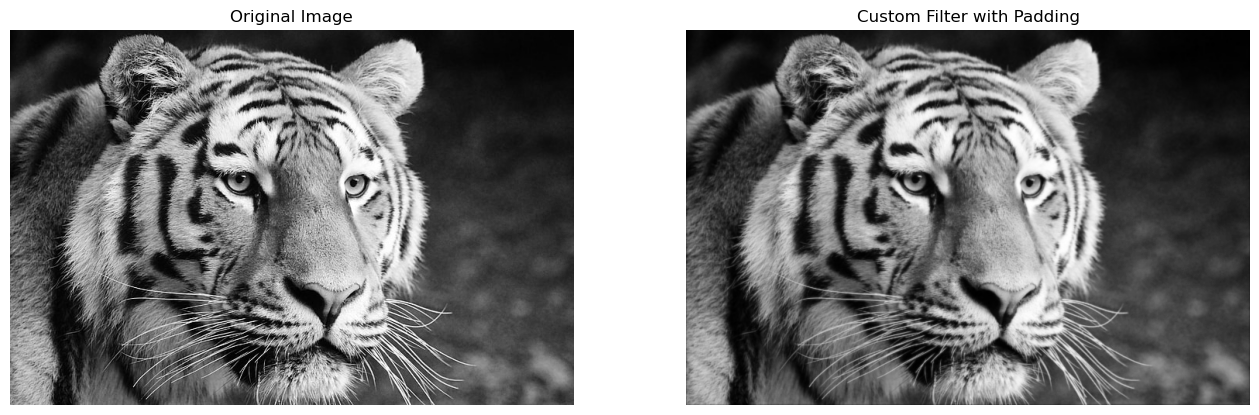

In [14]:
def pad_image(img, pad_size, pad_value=0):
    rows, cols = len(img), len(img[0])
    padded_img = [[pad_value] * (cols + 2 * pad_size) for _ in range(rows + 2 * pad_size)]
    
    for i in range(rows):
        for j in range(cols):
            padded_img[i + pad_size][j + pad_size] = img[i][j]
    
    return padded_img

def filter(img, i, j, weights):
    s = 0
    limit = len(weights[0]) // 2
    for a in range(-limit, limit + 1):
        for b in range(-limit, limit + 1):
            s += int(img[i + a][j + b]) * weights[a + limit][b + limit]

    weightsum = sum(sum(row) for row in weights)
    return s // weightsum if weightsum != 0 else s

weights = [
    [1, 2, 4, 2, 1],
    [2, 4, 16, 4, 2],
    [4, 16, 64, 16, 4],
    [2, 4, 16, 4, 2],
    [1, 2, 4, 2, 1]
]

img = cv2.imread("tiger.jpg", cv2.IMREAD_GRAYSCALE)
pad_size = len(weights) // 2
padded_img = pad_image(img, pad_size)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Original Image")
plt.plot()

rows, cols = len(img), len(img[0])
dummy = [[0] * cols for _ in range(rows)]
for i in range(rows):
    for j in range(cols):
        dummy[i][j] = filter(padded_img, i + pad_size, j + pad_size, weights)

plt.subplot(1, 2, 2)
plt.imshow(dummy, cmap="gray")
plt.axis("off")
plt.title("Custom Filter with Padding")
plt.plot()

[]

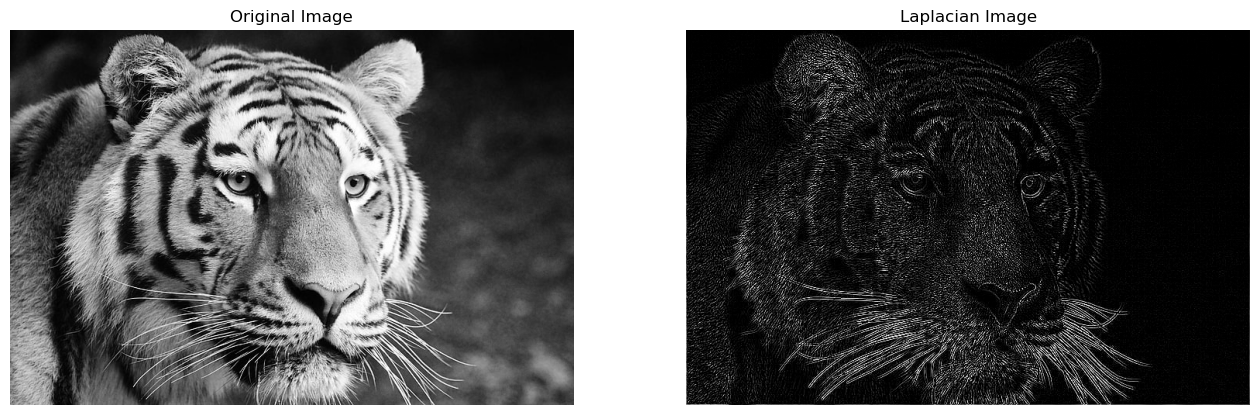

In [4]:
import cv2
import matplotlib.pyplot as plt

def customFilter(img, i, j, weights):
    s = 0
    for a in range(-1, 2):
        for b in range(-1, 2):
            s += int(img[i + a][j + b]) * weights[a + 1][b + 1]

    weightsum = sum(sum(row) for row in weights)
    result = s // weightsum if weightsum != 0 else s
    return max(0, min(255, result))

weights = [
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0],
]

img = cv2.imread("tiger.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="grey")
plt.axis("off")
plt.title("Original Image")
plt.plot()

rows, cols = img.shape
dummy = img.copy()
for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        dummy[i][j] = customFilter(img, i, j, weights)

plt.subplot(1, 2, 2)
plt.imshow(dummy, cmap="grey")
plt.axis("off")
plt.title("Laplacian Image")
plt.plot()

[]

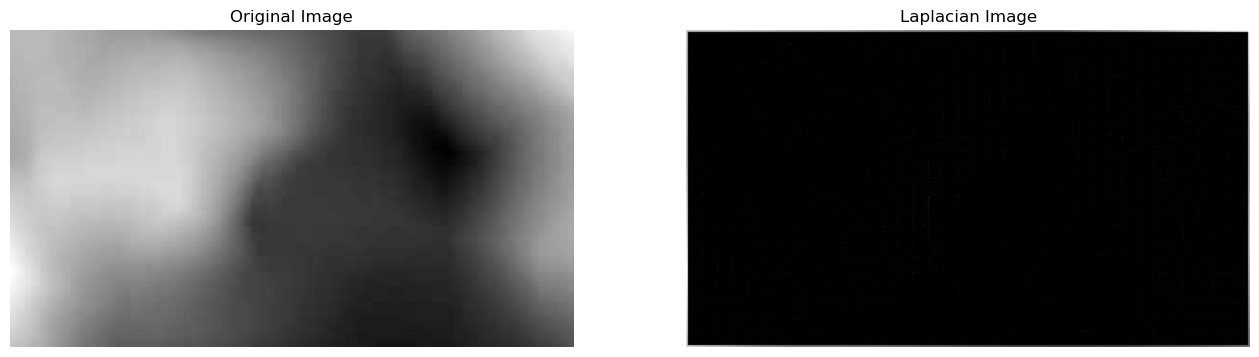

In [20]:
def customFilter(img, i, j, weights):
    s = 0
    for a in range(-1, 2):
        for b in range(-1, 2):
            s += int(img[i + a][j + b]) * weights[a + 1][b + 1]

    weightsum = sum(sum(row) for row in weights)
    result = s // weightsum if weightsum != 0 else s
    return max(0, min(255, result))  # Clamp the result to the range [0, 255]

weights = [
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0],
]

img = cv2.imread("gradient.jpeg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="grey")
plt.axis("off")
plt.title("Original Image")
plt.plot()

rows, cols = img.shape
dummy = img.copy()
for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        dummy[i][j] = customFilter(img, i, j, weights)

plt.subplot(1, 2, 2)
plt.imshow(dummy, cmap="grey")
plt.axis("off")
plt.title("Laplacian Image")
plt.plot()

[]

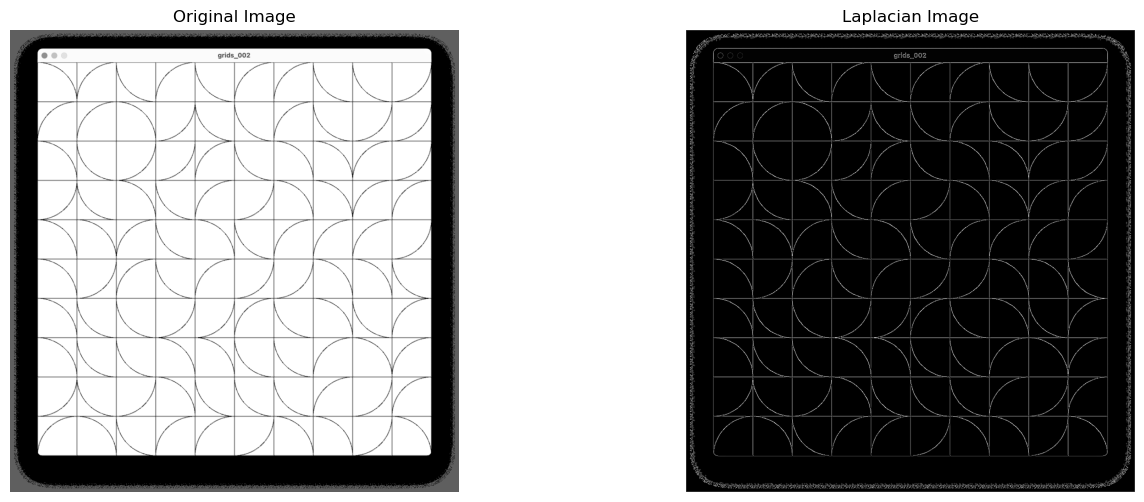

In [21]:
def customFilter(img, i, j, weights):
    s = 0
    for a in range(-1, 2):
        for b in range(-1, 2):
            s += int(img[i + a][j + b]) * weights[a + 1][b + 1]

    weightsum = sum(sum(row) for row in weights)
    result = s // weightsum if weightsum != 0 else s
    return max(0, min(255, result))  # Clamp the result to the range [0, 255]

weights = [
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0],
]

img = cv2.imread("grids.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="grey")
plt.axis("off")
plt.title("Original Image")
plt.plot()

rows, cols = img.shape
dummy = img.copy()
for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        dummy[i][j] = customFilter(img, i, j, weights)

plt.subplot(1, 2, 2)
plt.imshow(dummy, cmap="grey")
plt.axis("off")
plt.title("Laplacian Image")
plt.plot()